# <span style="color: #3E8E41;">Lung and Colon Cancer Histopathological Images Classification</span>

This notebook demonstrates how to work with the **Lung and Colon Cancer Histopathological Images** dataset. The dataset contains **25,000 images** across 5 categories. We will:

1. <span style="color: #0073e6;">**Load and display some images**</span> to visually inspect the data.
2. <span style="color: #0073e6;">**Implement a Convolutional Neural Network (CNN)**</span> for multiclass classification.
3. <span style="color: #0073e6;">**Apply a Pretrained Model (ResNet50)**</span> for comparison.
4. <span style="color: #0073e6;">**Compare the performance**</span> of the CNN and Pretrained Models.

---

## <span style="color: #3E8E41;">Step 1: Load and Display Some Sample Images</span>

Let's first inspect the dataset to ensure it is structured correctly and see some sample images.

### Dataset Structure:
The dataset contains images in the following directories:
- `colon_image_sets`
  - `colon_aca` - Colon Adenocarcinoma
  - `colon_n` - Normal Colon Tissue
- `lung_image_sets`
  - `lung_aca` - Lung Adenocarcinoma
  - `lung_n` - Normal Lung Tissue
  - `lung_scc` - Lung Squamous Cell Carcinoma

We will display a few random images from these categories.


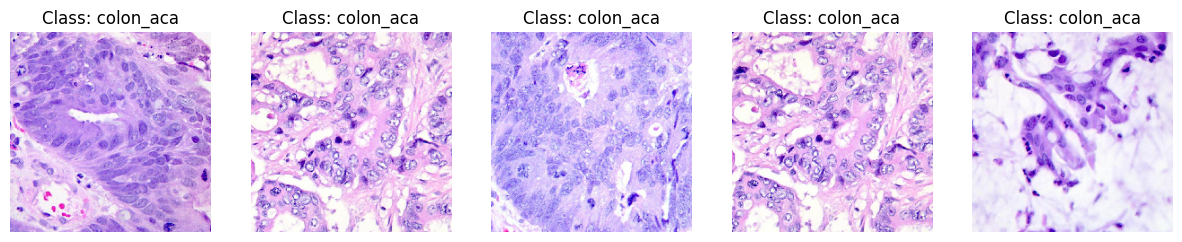

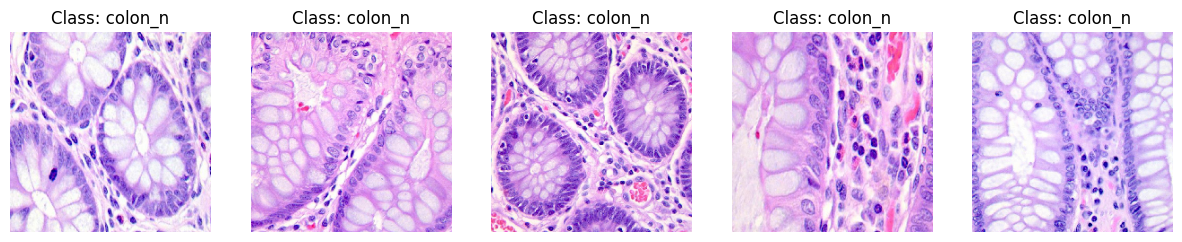

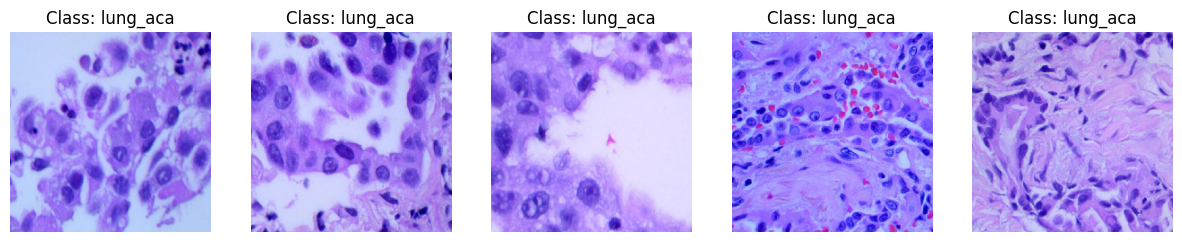

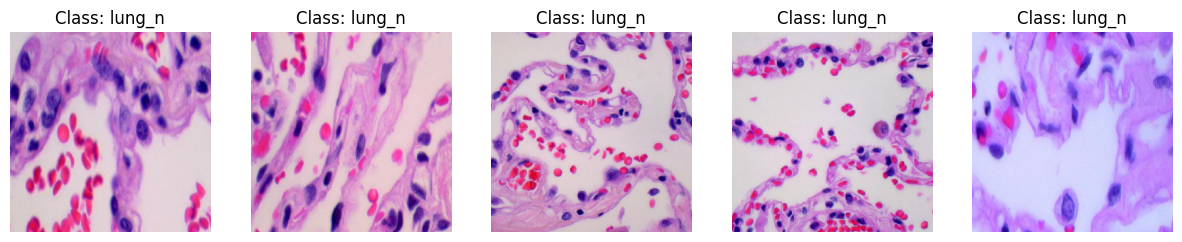

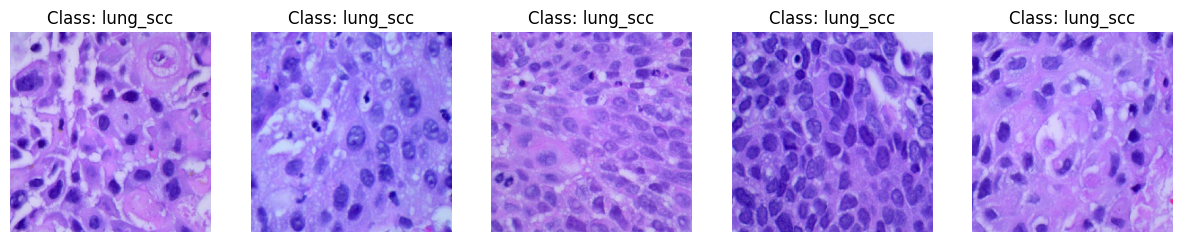

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
import os

# Dataset path and categories
dataset_path = 'lung_colon_image_set'
categories = ['colon_image_sets', 'lung_image_sets']

# Function to display images from a specific category
def display_images_from_category(category, num_images=5):
    category_path = os.path.join(dataset_path, category)
    subfolders = os.listdir(category_path)
    
    # Loop through subfolders (e.g., colon_aca, colon_n, etc.)
    for subfolder in subfolders:
        subfolder_path = os.path.join(category_path, subfolder)
        
        if os.path.isdir(subfolder_path):
            # List image files in the subfolder
            image_files = os.listdir(subfolder_path)
            
            # Pick a few random images to display
            selected_images = np.random.choice(image_files, num_images, replace=False)
            
            # Plot the selected images
            plt.figure(figsize=(15, 15))
            for i, image_file in enumerate(selected_images):
                img_path = os.path.join(subfolder_path, image_file)
                img = image.load_img(img_path, target_size=(224, 224))
                img_array = image.img_to_array(img) / 255.0  # Normalize image
                plt.subplot(1, num_images, i+1)
                plt.imshow(img_array)
                plt.title(f"Class: {subfolder}")
                plt.axis('off')
            plt.show()

# Display 5 images from each category
for category in categories:
    display_images_from_category(category, num_images=5)

<span style="color: #3E8E41;">Step 2: Preprocess and Load Images</span>
We'll resize all images to 224x224 pixels, normalize the pixel values, and split the dataset into 80% training / 20% validation. The ImageDataGenerator will be used for data augmentation.



In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)  
batch_size = 32

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2  # Split data into training and validation sets
)

# Load Training Data
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load Validation Data
val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
